# 1

In [1]:
import processing
from pathlib import Path
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from tqdm import tqdm

d:\Code\projects\BlindDeconvolution\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


пути к нашему датасету

In [2]:
root = Path("alg_test")
original_folder = root / Path("original")
blurred_folder = root / Path("blurred")
kernel_folder = root / Path("ground_truth_filters")
kernel_data_folder = root / Path("kernel_data")
restored_kernel_folder = root / Path("restored_kernel")
restored_folder = root / Path("restored")
table_folder = root / Path("tables")
image_folder = Path("images_dataset/original")


пути к ядрам

In [3]:
convolved_kernel_png = kernel_folder / Path("convolved_kernel.png")
convolved_kernel_npy = kernel_data_folder / Path("convolved_kernel.npy")

In [4]:
defocusdisk_png = kernel_folder / Path("defocusdisk.png")
defocusdisk_npy = kernel_data_folder / Path("defocusdisk.npy")

In [5]:
defocusgaussian_png = kernel_folder / Path("defocusgaussian.png")
defocusgaussian_npy = kernel_data_folder / Path("defocusgaussian.npy")

In [6]:
defocusring_png = kernel_folder / Path("defocusring.png")
defocusring_npy = kernel_data_folder / Path("defocusring.npy")

In [7]:
motionbsplinesimplecurve_png = kernel_folder / Path("motionbsplinesimplecurve.png")
motionbsplinesimplecurve_npy = kernel_data_folder / Path("motionbsplinesimplecurve.npy")

In [8]:
motionlinearexp_png = kernel_folder / Path("motionlinearexp.png")
motionlinearexp_npy = kernel_data_folder / Path("motionlinearexp.npy")

In [9]:
motionlinearuniform_png = kernel_folder / Path("motionlinearuniform.png")
motionlinearuniform_npy = kernel_data_folder / Path("motionlinearuniform.npy")

In [10]:
stretched_gaussian_kernel_png = kernel_folder / Path("stretched_gaussian_kernel.png")
stretched_gaussian_kernel_npy = kernel_data_folder / Path("stretched_gaussian_kernel.npy")

In [11]:
pairs = [
	(convolved_kernel_png,convolved_kernel_npy),
	(defocusdisk_png,defocusdisk_npy),
	(defocusgaussian_png,defocusgaussian_npy),
	(defocusring_png,defocusring_npy),
	(motionbsplinesimplecurve_png,motionbsplinesimplecurve_npy),
	(motionlinearexp_png,motionlinearexp_npy),
	(motionlinearuniform_png,motionlinearuniform_npy),
	(stretched_gaussian_kernel_png,stretched_gaussian_kernel_npy)
]

In [12]:
Processor = processing.Processing(original_folder,blurred_folder,restored_folder,table_folder,False,restored_kernel_folder)
image_filename = "airplane.png"
Processor.read_one(image_filename)

# 2

In [33]:
current_image = cv.imread(image_folder / image_filename)
kernel = np.load(convolved_kernel_npy)
filtered_image = cv.filter2D(current_image, -1, kernel)
restored_image = algorithm.process(filtered_image)

100%|██████████| 8/8 [00:12<00:00,  1.58s/it]


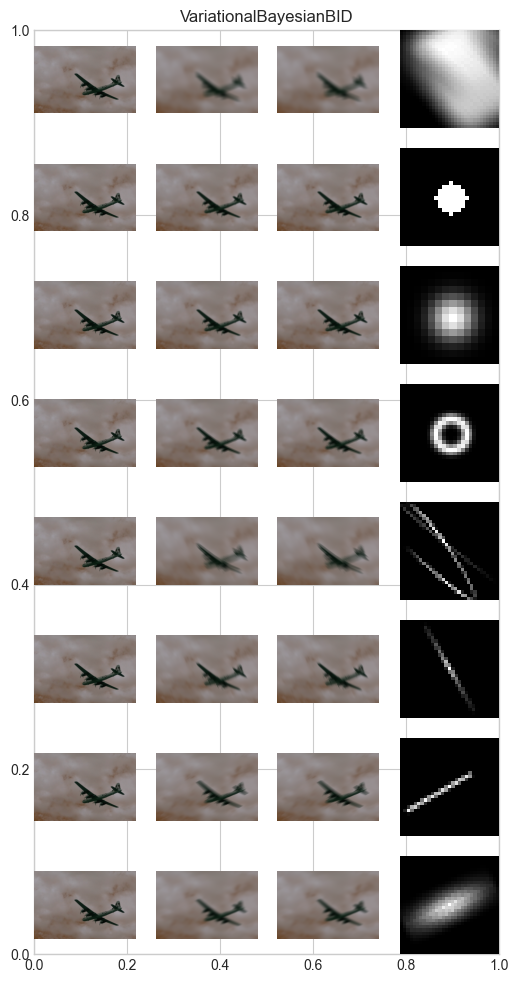

In [54]:
plt.figure(figsize=(6,12))
plt.title(algorithm.get_name())

for i,(png,npy) in enumerate(tqdm(pairs)):
	kernel_image = cv.imread(png)
	kernel = np.load(npy)
	filtered_image = cv.filter2D(current_image, -1, kernel)
	restored_image = algorithm.process(filtered_image)

	for j,img in enumerate([current_image,filtered_image,filtered_image]):
		plt.subplot(len(pairs),4,4*i + j+1)
		plt.imshow(img)
		plt.axis('off')
		plt.grid(False)

	plt.subplot(len(pairs),4,4*(i+1))
	plt.imshow(kernel_image)
	plt.axis('off')
	plt.grid(False)

plt.show()

# 3

Restored: airplane_convolved_kernel_VariationalBayesianBID.png (PSNR: 23.51, SSIM: 0.8349)


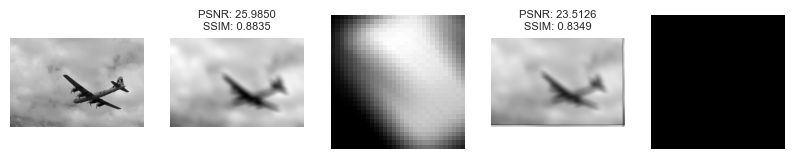

Restored: airplane_defocusdisk_VariationalBayesianBID.png (PSNR: 22.60, SSIM: 0.8182)


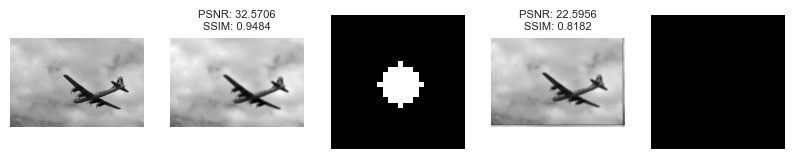

Restored: airplane_defocusgaussian_VariationalBayesianBID.png (PSNR: 22.59, SSIM: 0.8199)


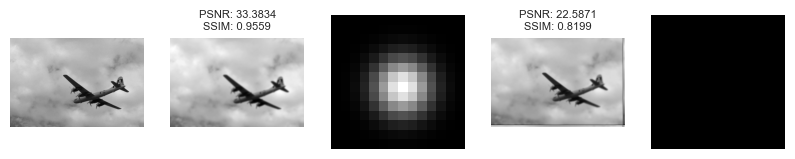

Restored: airplane_defocusring_VariationalBayesianBID.png (PSNR: 22.91, SSIM: 0.8212)


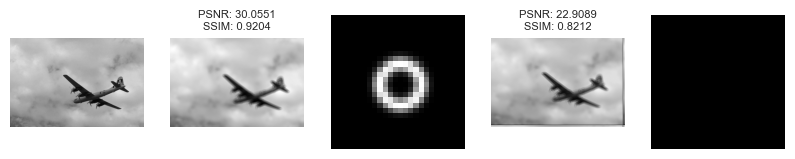

Restored: airplane_motionbsplinesimplecurve_VariationalBayesianBID.png (PSNR: 23.50, SSIM: 0.8350)


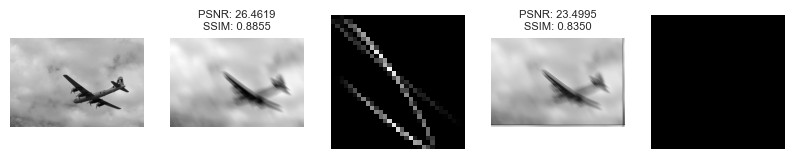

Restored: airplane_motionlinearexp_VariationalBayesianBID.png (PSNR: 23.54, SSIM: 0.8336)


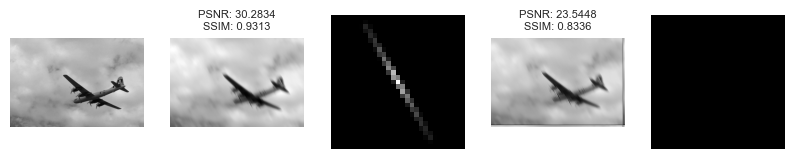

Restored: airplane_motionlinearuniform_VariationalBayesianBID.png (PSNR: 22.13, SSIM: 0.8061)


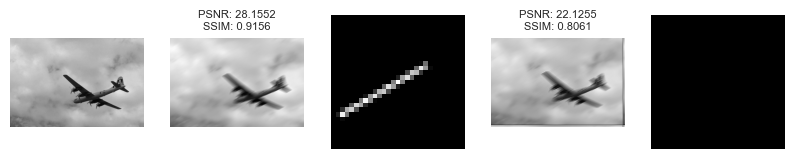

Restored: airplane_stretched_gaussian_kernel_VariationalBayesianBID.png (PSNR: 22.70, SSIM: 0.8188)


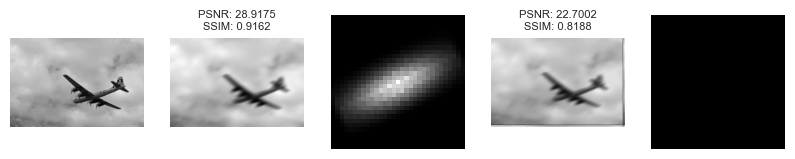

In [13]:
from algorithms.unsorted.VariationalBayesianBID import VariationalBayesianBIDAlgorithm
algorithm = VariationalBayesianBIDAlgorithm()

for png,npy in pairs:
	Processor.save_filter()
	Processor.custom_filter(png,npy)

	Processor.process(algorithm,unique_path=False)

	Processor.show_line(window_scale=2.0,fontsize=8)

Restore error alg_test\original\airplane.png: too many values to unpack (expected 2)


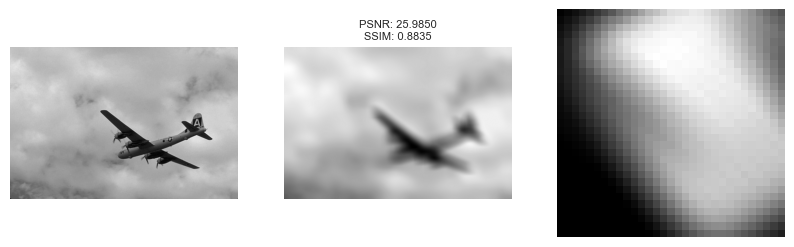

Restore error alg_test\original\airplane.png: too many values to unpack (expected 2)


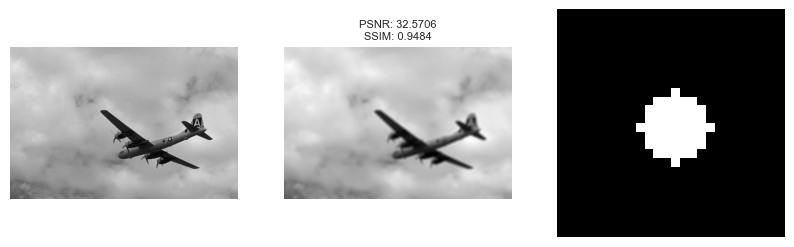

Restore error alg_test\original\airplane.png: too many values to unpack (expected 2)


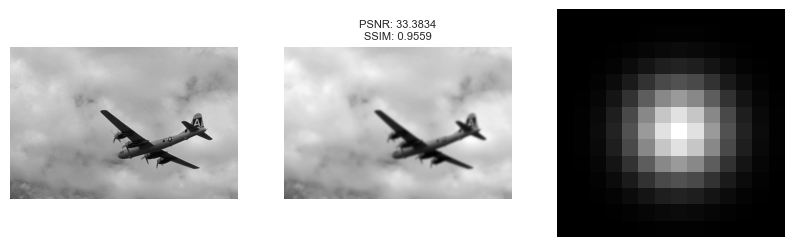

Restore error alg_test\original\airplane.png: too many values to unpack (expected 2)


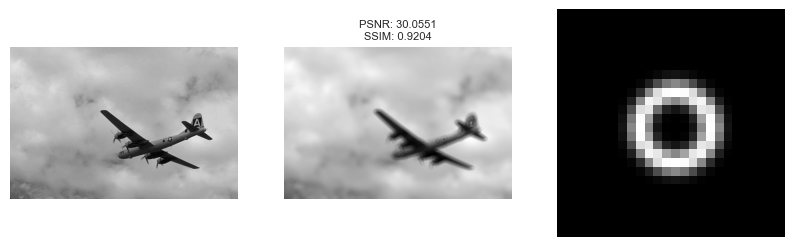

Restore error alg_test\original\airplane.png: too many values to unpack (expected 2)


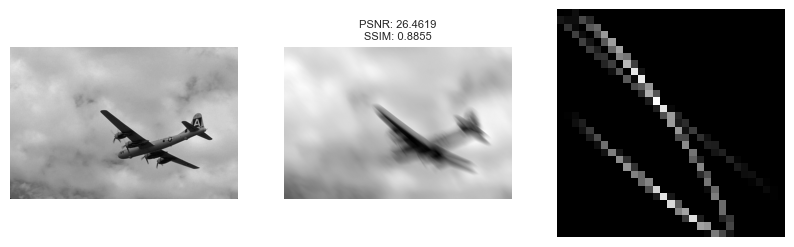

Restore error alg_test\original\airplane.png: too many values to unpack (expected 2)


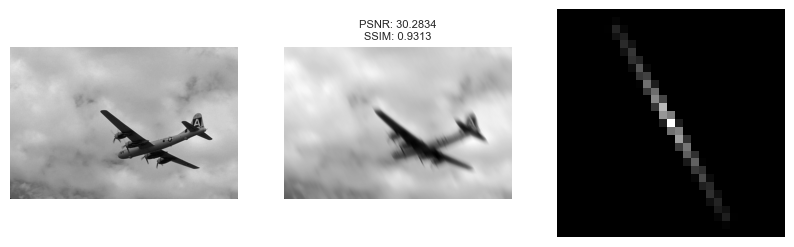

Restore error alg_test\original\airplane.png: too many values to unpack (expected 2)


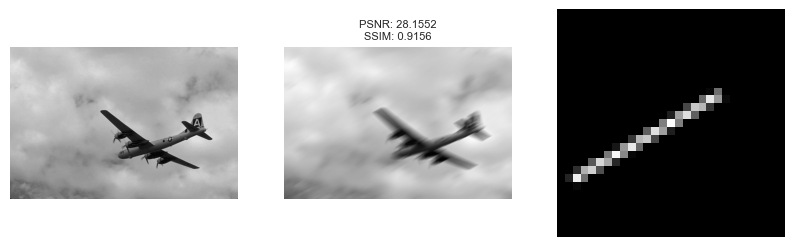

Restore error alg_test\original\airplane.png: too many values to unpack (expected 2)


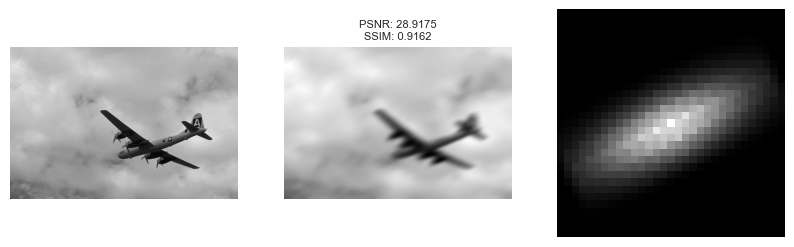

In [14]:
from algorithms.unsorted.VariationalBayesianBID import VBAmizicBIDAlgorithm
algorithm = VBAmizicBIDAlgorithm()

for png,npy in pairs:
	Processor.save_filter()
	Processor.custom_filter(png,npy)

	Processor.process(algorithm,unique_path=False)

	Processor.show_line(window_scale=2.0,fontsize=8)

In [16]:
from algorithms.unsorted.richardson_lucy import RihardsonLucy
algorithm = RihardsonLucy()

for png,npy in pairs:
	Processor.save_filter()
	Processor.custom_filter(png,npy)

	Processor.process(algorithm,unique_path=False)

	Processor.show_line(window_scale=2.0,fontsize=8)

TypeError: RihardsonLucy.__init__() missing 1 required positional argument: 'param'

In [17]:
from algorithms.unsorted.MAP import MAP
algorithm = MAP()

for png,npy in pairs:
	Processor.save_filter()
	Processor.custom_filter(png,npy)

	Processor.process(algorithm,unique_path=False)

	Processor.show_line(window_scale=2.0,fontsize=8)

TypeError: MAP.__init__() missing 5 required positional arguments: 'max_iter', 'Huber_threshold', 'predict_kernel', 'operator', and 'relaxation_factor'